In [1]:
# 如果你的显示器分辨率很高，notebook在屏幕中显示太小，可以打开这段代码，其中的width表示，大小占据屏幕的百合比。100%就是完全占据
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

## 运行代码前，请检查你的python版本，理论上兼容3.x版本。编写本文时所用版本为3.5.2。

In [2]:
#版本检查
import platform  
print ('python env:',platform.python_version() )

python env: 3.5.2


# 引入概率
## 1.回归是怎么来的呢？
### 英国人类学家F.Galton和统计学家Karl Pearson对上千个家庭的身高做了测量，发现儿子身高（Y）与父亲身高（X）存在一定的关系：
### 高个子的父代的子代在成年之后的身高平均来说不是更高，而是稍矮于其父代水平，而矮个子父代的子代的平均身高不是更矮，而是稍高于其父代水平。
### Galton将这种趋向于种族稳定的现象称之“回归”。
### 目前，“回归”已成为表示变量之间某种数量依存关系的统计学术语，如研究糖尿病人血糖与其胰岛素水平的关系，研究儿童年龄与体重的关系等。
## 2.回归分析
### 回归分析就是一个函数估计的问题。目的是找出自变量X与因变量Y之间的关系。即：y = f(x)
## 3.回归分为线性回归和非线性回归。
### 线性回归中的公式都是一次的，如一元一次方程，二元一次方程等。
### 非线性回归则可以有多种形式，如多元N次方程，log函数等。

# 线性回归
## 1.一元线性回归
### 一元线性回归是研究一个自变量与一个因变量的统计关系Y=aX+b。
### 线性回归的任务：用恰当的方法，估计出参数a，b。回归问题从某种视角看，视同参数估计问题
## 2.经典案例引入 --房屋价格问题 
### 假如你在在帝都的立水桥拥有一套100平的房子，现在你要出来创业，需要把房子卖掉，那么大概应该挂一个什么样的价格呢？于是收集了立水桥周边二手房的价格

![image.png](http://upload-images.jianshu.io/upload_images/1656466-d587d6412c243792.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 我们将这些点描绘在坐标轴上，尝试用一条直线（y = ax + b）去拟合这些点
![image.png](http://upload-images.jianshu.io/upload_images/1656466-99e1efdbda7cb3b9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 现在我们将x=100代入这条拟合直线，那么我们可以求出一个估计值。
### 现在提出一个问题：如何保证估计值得准确性呢？要是低估了房屋价格，说不定会少得到好几百万。
### 要保证准确性，就要求找到的这条直线（y= ax+ b）与各个样本点的误差最小，也就是找到最佳参数 a，b。所以我们计
### 算出估计值与实际值之间的差值，加起来就得到误差总和，找到一组a，b 得到最小的误差总和 
![image.png](http://upload-images.jianshu.io/upload_images/1656466-44524497083a8130.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 3.模型建立
### 实际中，影响房价的因素非常多，如房屋的地段、面积、朝向、所在小区、房间的个数等。考虑更多的情况，我们用x1，x2...xn 去描述这些影响房屋售价的因素(特征)。如x1=房间的面积，x2=房间的个数等等。
### 为了使估价更为准确，我们决定考虑两个变量， 可以由三维坐标表示房屋售价。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-10d6fd2a424f8d98.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 沿着上面的思路，当我们考虑两个变量时，也可以写出一个估计函数 y = ax1+ bx2 + c 这里为了后面的统一性，我们把公式写成 

![image.png](http://upload-images.jianshu.io/upload_images/1656466-c62fda0f199b2fae.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


 ##                        中心极限定理
![image.png](http://upload-images.jianshu.io/upload_images/1656466-d1ba21ca92f91893.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![image.png](http://upload-images.jianshu.io/upload_images/1656466-ae736474b4b504de.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 接下来我们就可以计算概率密度函数

![image.png](http://upload-images.jianshu.io/upload_images/1656466-3811815b7c40f67b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 似然函数

![image.png](http://upload-images.jianshu.io/upload_images/1656466-63c86579d735262c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![image.png](http://upload-images.jianshu.io/upload_images/1656466-64fc8e1a91885a58.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 这样我们就得到了日常所说的损失函数，至于为什么有二分之一，就是为了方便计算，后面我们会给出解释

# 求解损失函数 这里给出两种求解思路

## 直接求极值法

### 上式中只有θ是未知数，如何求解函数的最小值。通常做法：
### （1）对目标函数J(θ)求导；
### （2）令导数为0，求得的点，即为极值点
### 上述方法即是最小二乘法偏差(偏差平方和最小)的思路。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-d6a26d9beeb86eee.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


![image.png](http://upload-images.jianshu.io/upload_images/1656466-ae47e080317cff22.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 如果看着字母觉得抽象，这里附上一道简单的数学题，帮助理解
![image.png](http://upload-images.jianshu.io/upload_images/1656466-22b5bb8dc7e450f7.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 显然，上面的这种求解方式有很大的局限性，如果维素越多，越麻烦，所以我们需要找到一个通用的求解方法。

## 标准回归函数解析式求解

![image.png](http://upload-images.jianshu.io/upload_images/1656466-aafb57fb8ce8cd84.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![image.png](http://upload-images.jianshu.io/upload_images/1656466-a739177cf2af8388.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 过拟合与欠拟合

![image.png](http://upload-images.jianshu.io/upload_images/1656466-908897abab4a0054.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 形象的说就是：一个人上课老师讲的题，都掌握的很好，但是下课后的变式练习题做的很差。俗称书呆子。在这里也就是说模型的泛化能力弱。

## 最小二乘意义下的参数最优解

![image.png](http://upload-images.jianshu.io/upload_images/1656466-cce5fdd09790d1e8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 加入λ扰动后

![image.png](http://upload-images.jianshu.io/upload_images/1656466-23c7f43fa2eafd84.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 正则项与防止过拟合

![image.png](http://upload-images.jianshu.io/upload_images/1656466-b3731e3bc72a6fd1.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### [详解L1,L2](http://blog.csdn.net/zouxy09/article/details/24971995)
### 这里α就是我们要去调的超参数

## Ridge回归

![image.png](http://upload-images.jianshu.io/upload_images/1656466-990a1342bd25436d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 其实在这里可以看出 Ridge回归就是我们的L2正则

## Lasso回归
### Lasso回归就是我们的L1正则，因为存在一个绝对值，所以在求解上相对的复杂。
### Lasso回归常用的解法：坐标轴下降法
为了找到一个函数的局部极小值，在每次迭代中可以在当前点处沿一个坐标方向进行一维搜索。在整个过程中循环使用不同的坐标方向。一个周期的一维搜索迭代过程相当于一个梯度迭代（如果你了解KD树算法，这里就是一样的，假设三维情况下，先沿x，在沿y，最后z。然后又从x开始，往复循环）。 其实，gradient descent 方法是利用目标函数的导数（梯度）来确定搜索方向的，而该梯度方向可能不与任何坐标轴平行。而坐标轴下降方法是利用当前坐标系统进行搜索，不需要求目标函数的导数，只按照某一坐标方向进行搜索最小值。坐标下降法在稀疏矩阵上的计算速度非常快，同时也是Lasso回归最快的解法。

# 案例实战
## 标准回归函数找最佳拟合直线
### 我们先看看数据长啥样子
![image.png](http://upload-images.jianshu.io/upload_images/1656466-c919bcf92288fc28.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [3]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline 
#将matplotlib的图表直接嵌入到Notebook之中

### 设置matplotlib全局配置用黑体显示中文 (注意：linux系统如果没有这个字体需要另外调)

In [4]:
matplotlib.rcParams['font.family'] = 'SimHei'

### 获取训练数据
#### dataList：训练数据的特征
#### targetList：训练数据的目标值

In [5]:
def loadDataSet(filename):
    #获取特征维数 读取第一行数据，按\t切分数据，减1是因为最后一列是目标值
    numFeat=len(open(filename).readline().split('\t'))-1 
    dataList=[]#存样本的特征
    targetList=[]#存样本对应的类别标签
    fr=open(filename)
    #按行获取样本数据:特征+目标值
    for line in fr.readlines():
        lineList=[]
        curLine=line.strip().split('\t')#strip函数去空格，按回车切分
        #每个样本的特征（按行存）
        for i in range(numFeat):
            lineList.append(float(curLine[i]))#获取当前行第i列的特征
        dataList.append(lineList)#按行累加存储样本特征
        targetList.append(float(curLine[-1]))#[-1]取出的是最后一列，样本的类别标签
    return dataList,targetList

In [6]:
dataMatIn, classLabels = loadDataSet('ex0.txt')
print(dataMatIn)
print(classLabels)

[[1.0, 0.067732], [1.0, 0.42781], [1.0, 0.995731], [1.0, 0.738336], [1.0, 0.981083], [1.0, 0.526171], [1.0, 0.378887], [1.0, 0.033859], [1.0, 0.132791], [1.0, 0.138306], [1.0, 0.247809], [1.0, 0.64827], [1.0, 0.731209], [1.0, 0.236833], [1.0, 0.969788], [1.0, 0.607492], [1.0, 0.358622], [1.0, 0.147846], [1.0, 0.63782], [1.0, 0.230372], [1.0, 0.070237], [1.0, 0.067154], [1.0, 0.925577], [1.0, 0.717733], [1.0, 0.015371], [1.0, 0.33507], [1.0, 0.040486], [1.0, 0.212575], [1.0, 0.617218], [1.0, 0.541196], [1.0, 0.045353], [1.0, 0.126762], [1.0, 0.556486], [1.0, 0.901144], [1.0, 0.958476], [1.0, 0.274561], [1.0, 0.394396], [1.0, 0.87248], [1.0, 0.409932], [1.0, 0.908969], [1.0, 0.166819], [1.0, 0.665016], [1.0, 0.263727], [1.0, 0.231214], [1.0, 0.552928], [1.0, 0.047744], [1.0, 0.365746], [1.0, 0.495002], [1.0, 0.493466], [1.0, 0.792101], [1.0, 0.76966], [1.0, 0.251821], [1.0, 0.181951], [1.0, 0.808177], [1.0, 0.334116], [1.0, 0.33863], [1.0, 0.452584], [1.0, 0.69477], [1.0, 0.590902], [1.0

## 标准回归函数求解回归系数
### 样本特征数据xArr
### 样本的目标值yArr
#### 说明 .T是转置   .I是求逆

In [7]:
def standRegres(xArr,yArr):
    #转成矩阵类型
    xMat = np.mat(xArr)
    #行向量转置为列向量形式
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    #对xTx求逆，需要满足其行列式不为0
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    #回归参数
    ws = xTx.I * xMat.T*yMat 
    return ws

In [8]:
w_LS=standRegres(dataMatIn,classLabels)
print('θ_0:',w_LS[0],'θ_1:',w_LS[1])

θ_0: [[ 3.00774324]] θ_1: [[ 1.69532264]]


In [9]:
def standplot(xarr,yarr,w):
    xmat=np.mat(xarr)
    ymat=np.mat(yarr)
    #画点
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xmat[:,1].flatten().A[0],ymat.T[:,0].flatten().A[0])
    #画线，为了保证直线上的点是按顺序排列，需按升序排列
    xCopy = xmat.copy()
    #排序
    xCopy.sort(0)  #排序
    yHat = xCopy*w #预测值
    ax.plot(xCopy[:,1],yHat,color = 'r',linewidth=2.0)
    plt.show()

### 画出我们的样本点与拟合直线
#### 蓝色点为样本点，红色直线为拟合直线

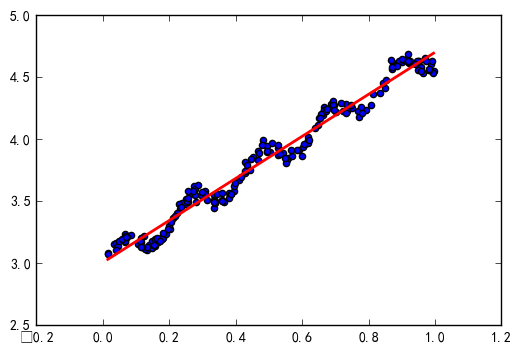

In [10]:
standplot(dataMatIn,classLabels,w_LS)

### 测试


In [11]:
testdata = [1.000000,0.427810]
ypredict = testdata * w_LS
print(ypredict,'error:',abs(ypredict -3.816464))

[[ 3.73301922]] error: [[ 0.08344478]]


#### 可以看到其实我们拟合的还不错，毕竟是一阶情况下，这个误差能接受

## 交叉验证
### 交叉验证可以帮助我们找到更优的参数。一般数据我们这样划分。大部分作为训练数据，普遍是70%-80%，小部分作为训练数据，20%-30%，当然这个值并没有固定的说法，你可以根据自己的经验或者喜好来。
### 具体做法就是，比如5折交叉验证，就是把训练数据分成五份，每次取其中4份训练，一份做验证，然后取5次结果的平均或者其他的经验方法。5折，10折都是比较常用的

## 局部加权线性回归
### 假设目标值复合线性模型，那么使用线性回归自然能拟合得很好，但是如果目标假设不是线性模型，比如忽上忽下的样本目标值，这时用线性模型就会拟合得很差。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-15f16ded3161e690.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-47de8fa4757a0193.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 权值
![image.png](http://upload-images.jianshu.io/upload_images/1656466-2e4443dc59388130.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-4a429bed16125e55.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-ce5235966cd46d68.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


### 求解
![image.png](http://upload-images.jianshu.io/upload_images/1656466-1bce05c68dd31975.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-cf903af4e4947b3e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-db60e6d1f13746b8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


### 代码实践
#### testPoint:测试样本点
#### xArr：训练样本集
#### yArr：训练样本集目标值

In [12]:
# 这里需要对k值调参，你可以加一个for循环，暴力的求解（0.01,1）范围内的最合适的k值。
def lwlr(testPoint,xArr,yArr,k):
    xMat=np.mat(xArr)     #样本特征数据
    yMat=np.mat(yArr).T   #类别标签，行转列
    m=np.shape(xMat)[0]   #样本数
    weights=np.mat(np.eye(m))#mxm单位方阵
    #遍历所有样本，计算每个样本对于测试样本点的权值
    for i in range(m):
        #测试样本点与每个训练样本的向量差
        diffMat=testPoint-xMat[i,:]
        #对角矩阵weights的对角线上存权值alpha
        weights[i,i]=np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTX=xMat.T*weights*xMat
    # 行列式为0，此方法不可解
    if np.linalg.det(xTX)==0.0:
        print("这个矩阵是奇异的，不能做逆")
        return
    #回归系数
    ws=xTX.I*(xMat.T*weights*yMat)
    return testPoint*ws

### 数据测试，遍历所有的测试点，给每个测试点一个预测值

In [13]:
def lwlrTest(testArr,xArr,yArr,k=1.0):
    #获取测试数据集条数
    m=np.shape(testArr)[0]
    yHat=np.zeros(m)
    #遍历所有测试数据
    for i in range(m):
        #使用局部加权线性回归
        #给出每个测试数据的预测值
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    #返回所有测试数据的预测值
    return yHat

### 图形化展示局部加权回归不同k值的回归结果，包括数据集及它的最佳拟合直线
### 这段代码仅限在pycharm等编译器中使用，在nootbook中显示有少许问题

In [14]:
# fig=plt.figure()#目的是只生成一个fig对象 #
# def lwlrPlot(xArr,yArr,yHat,m):
#     #样本特征数据xArr
#     #样本的目标值yArr
#     #预测值yHat
#     xMat=np.mat(xArr)
#     srtInd=xMat[:,1].argsort(0)   #等价于argsort(xMat[:,1],0)
#     xSort=xMat[srtInd][:,0,:]     #等价于xMat[srtInd.flatten().A[0]]
#     #fig=plt.figure()
#     ax=fig.add_subplot(2,3,m)
#     #直线图plt.plot(),画plot前要排序
#     #ax.plot(xMat[:,1],yHat[:].T)
#     ax.plot(xSort[:,1],yHat[srtInd])
#     #画散点图不需要排序
#     ax.scatter(xMat[:,1].flatten().A[0],np.mat(yHat).T.flatten().A[0],s=2,c='k')
#     ax.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r')  #散点图plt.scatter()
# def lwlrPlot3(xArr,yArr):               #输入：xArr是n×d矩阵/数组/列表；yArr是n×1
#     xMat=np.mat(xArr)
#     srtInd=xMat[:,1].argsort(0)         #等价于argsort(xMat[:,1],0)
#     # argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y
#     xSort=xMat[srtInd][:,0,:]           #等价于xMat[srtInd.flatten().A[0]]
#     yHat1=lwlrTest(xArr,xArr,yArr,1)    #调用局部加权回归(lwlr)主函数
#     yHat2=lwlrTest(xArr,xArr,yArr,0.01)
#     yHat3=lwlrTest(xArr,xArr,yArr,0.002)
#     fig=plt.figure()
#     ax1=fig.add_subplot(311)
#     ax2=fig.add_subplot(312)
#     ax3=fig.add_subplot(313)
#     #画直线图需要排序
#     #直线图plt.plot(),plot前要排序
#     #ax1.plot(xMat[:,1],yHat[:].T)
#     ax1.plot(xSort[:,1],yHat1[srtInd])
#     ax2.plot(xSort[:,1],yHat2[srtInd])
#     ax3.plot(xSort[:,1],yHat3[srtInd])
#     #画散点图不需要排序
#     ax1.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'欠拟合')  #散点图plt.scatter()
#     ax2.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'最好')
#     ax3.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'过拟合')
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper left')
#     ax3.legend(loc='upper left')
#     plt.show()

### notebook中运行下面的代码

In [15]:
#fig=plt.figure()#目的是只生成一个fig对象
def lwlrPlot(xArr,yArr,yHat,m):
    #样本特征数据xArr
    #样本的目标值yArr
    #预测值yHat
    xMat=np.mat(xArr)
    srtInd=xMat[:,1].argsort(0)   #等价于argsort(xMat[:,1],0)
    xSort=xMat[srtInd][:,0,:]     #等价于xMat[srtInd.flatten().A[0]]
    fig=plt.figure(figsize=(15,15)) #
    ax=fig.add_subplot(3,2,m)
    #直线图plt.plot(),画plot前要排序
    #ax.plot(xMat[:,1],yHat[:].T)
    ax.plot(xSort[:,1],yHat[srtInd])
    #画散点图不需要排序
    ax.scatter(xMat[:,1].flatten().A[0],np.mat(yHat).T.flatten().A[0],s=2,color='k')
    ax.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,color='r')  #散点图plt.scatter()
    #plt.show()

def lwlrPlot3(xArr,yArr):               #输入：xArr是n×d矩阵/数组/列表；yArr是n×1
    xMat=np.mat(xArr)
    srtInd=xMat[:,1].argsort(0)         #等价于argsort(xMat[:,1],0)
    # argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y
    xSort=xMat[srtInd][:,0,:]           #等价于xMat[srtInd.flatten().A[0]]
    yHat1=lwlrTest(xArr,xArr,yArr,1)    #调用局部加权回归(lwlr)主函数
    yHat2=lwlrTest(xArr,xArr,yArr,0.01)
    yHat3=lwlrTest(xArr,xArr,yArr,0.002)
    fig=plt.figure(figsize=(5,10))
    ax1=fig.add_subplot(311)
    ax2=fig.add_subplot(312)
    ax3=fig.add_subplot(313)
    #画直线图需要排序
    #直线图plt.plot(),plot前要排序
    #ax1.plot(xMat[:,1],yHat[:].T)
    ax1.plot(xSort[:,1],yHat1[srtInd])
    ax2.plot(xSort[:,1],yHat2[srtInd])
    ax3.plot(xSort[:,1],yHat3[srtInd])
    #画散点图不需要排序
    ax1.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'欠拟合')  #散点图plt.scatter()
    ax2.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'最好')
    ax3.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='r',label=u'过拟合')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    plt.show()

局部加权线性回归法
0.003
m= 1
0.01
m= 2
0.05
m= 3
0.1
m= 4
0.5
m= 5
1
m= 6


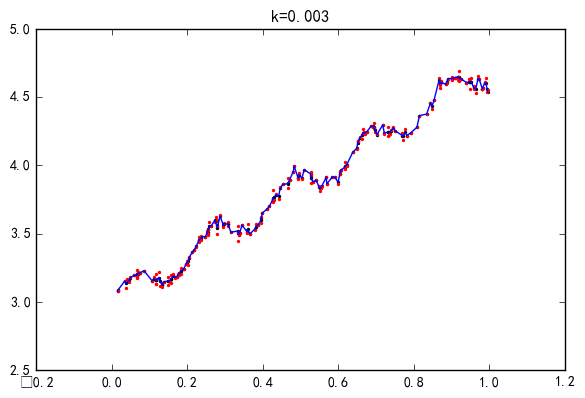

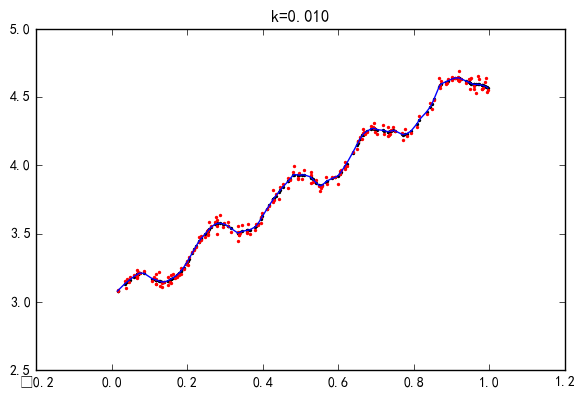

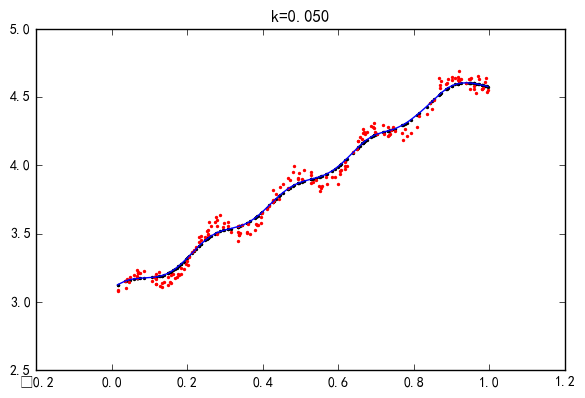

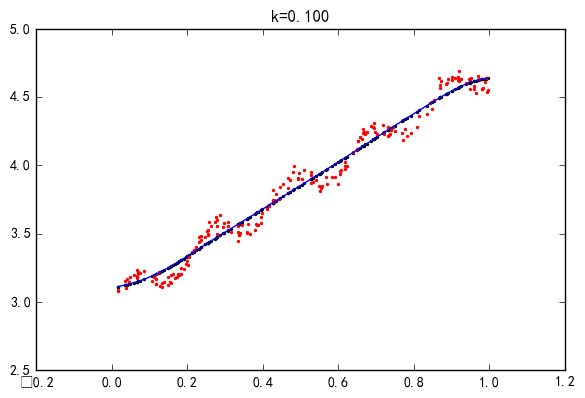

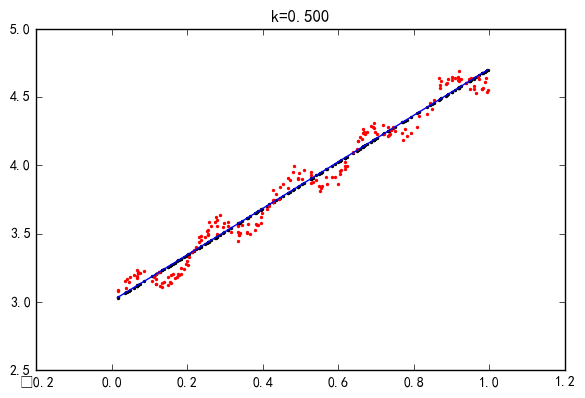

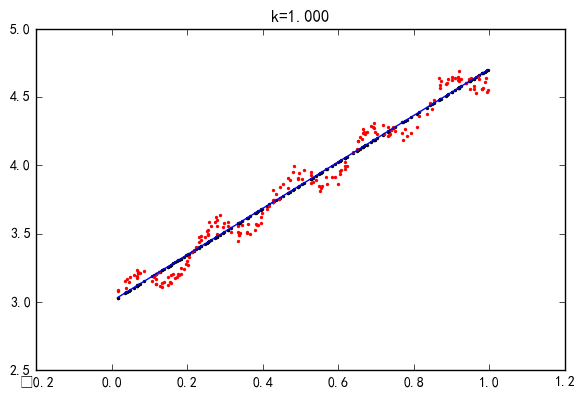

In [16]:
print("局部加权线性回归法")
k = [0.003,0.01, 0.05, 0.1, 0.5, 1]
m = 1
for i in k:
    print(i)
    #plt.subplot(3, 4, m)
    lw_ls = lwlrTest(dataMatIn, dataMatIn, classLabels, i)
    print('m=',m)
    lwlrPlot(dataMatIn, classLabels, lw_ls,m)
    #plt.axis('off')#不显示轴
    plt.title('k=%0.3f'%i)#设置标题，'k=%0.3f'表示在字符串中插入一个浮点型数据保留3位小数
    m+=1

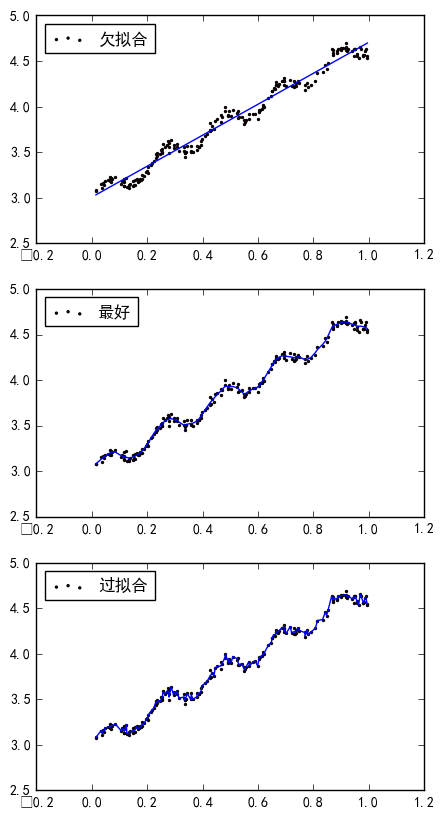

In [17]:
plt.suptitle('局部回归加权回归不同K值结果图', fontsize=10)
lwlrPlot3(dataMatIn, classLabels)

## 讲完造轮子，咱们来看看如果用别人造好的轮子 -- scikit-learn

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### 导入我们的Lasso和Ridge模型

In [20]:
from sklearn.linear_model import Lasso, Ridge

In [21]:
import sklearn
print(sklearn.__version__)

0.19.1


## 请务必检查你的scikit-learn版本，如果低于0.18版本，下面的导入语句会报错。
#### from sklearn.grid_search import GridSearchCV  #自版本0.18以来已弃用：此模块将以0.20移除。使用sklearn.model_selection.GridSearchCV来代替

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### pandas读入数据

In [25]:
data = pd.read_csv('Advertising.csv')  # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
print(data.head(5))#预览前5行数据

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


### 默认test_size=0.25
### train_test_split将数组或矩阵分割成随机的训练子集和测试子集
### random_state属性值为空(默认为空)则随机分配测试集和训练集，随机分配会导致你的训练和测试误差一直在变，所以最好是固定一个随机数种子，任意数字都可以。

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=1)

### 选取模型 也可以使用pipeline

In [27]:
model = Lasso()
#model = Ridge()

In [30]:
alpha_can =np.logspace(-2,3,100) #在10的-2次方和10的3次方之间生成100个等差数
np.set_printoptions(suppress=True)#set_printoptions设置打印选项。参数suppress是否抑制小型浮点值的打印使用科学的符号(默认false)。
print(alpha_can)

[    0.01           0.01123324     0.01261857     0.01417474     0.01592283
     0.0178865      0.02009233     0.0225702      0.02535364     0.02848036
     0.03199267     0.03593814     0.04037017     0.04534879     0.05094138
     0.05722368     0.06428073     0.07220809     0.08111308     0.09111628
     0.1023531      0.1149757      0.12915497     0.14508288     0.16297508
     0.18307383     0.20565123     0.23101297     0.25950242     0.29150531
     0.32745492     0.36783798     0.41320124     0.46415888     0.52140083
     0.58570208     0.65793322     0.7390722      0.83021757     0.93260335
     1.04761575     1.17681195     1.32194115     1.48496826     1.66810054
     1.87381742     2.10490414     2.36448941     2.65608778     2.98364724
     3.35160265     3.76493581     4.22924287     4.75081016     5.33669923
     5.9948425      6.73415066     7.56463328     8.49753436     9.54548457
    10.72267222    12.0450354     13.53047775    15.19911083    17.07352647
    19.17910

### GridSearchCV是sklearn.model_selection的自动调参方法，
### cv表示cv:int，交叉验证生成器或可重复的，可选的确定跨验证分割策略，俗称k折交叉验证
### param_grid字典或字典列表带参数名(字符串)的字典作为键和列表参数设置作为值，或者是一个这样的列表字典，在这种情况下，每一个字典所覆盖的网格在列表中探索。

In [31]:
regression_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=10)#就是做10折交叉验证，寻找在alpha_can中寻找最优的alpha

### fit运行所有训练集
### regression_model.best_params_  返回最好的超参alpha

In [35]:
regression_model.fit(x_train, y_train)
print('最优超参数：', regression_model.best_params_)

最优超参数： {'alpha': 3.7649358067924674}
GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([    0.01   ,     0.01123, ...,   890.21509,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [37]:
regression_model

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([    0.01   ,     0.01123, ...,   890.21509,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### 我们打印regression_model，可以看到整个模型的参数设置。更详细的介绍请看[这里](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### argsort函数返回的是数组值从小到大的索引值,axis=0表述列,axis=1表述行

In [ ]:
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order,:]

### 用predict进行预测

In [39]:
y_hat = regression_model.predict(x_test)
r=regression_model.score(x_test, y_test)#返回模型的得分。其实质就是可决系数（R2,R方），值越接近于1，拟合程度越好。
print(r)

0.907994742038


In [41]:
mse = np.average((y_hat - np.array(y_test)) ** 2)  # 均方误差
rmse = np.sqrt(mse)  # 根均方误差
mse,rmse 

(2.1513806601695107, 1.4667585555126348)

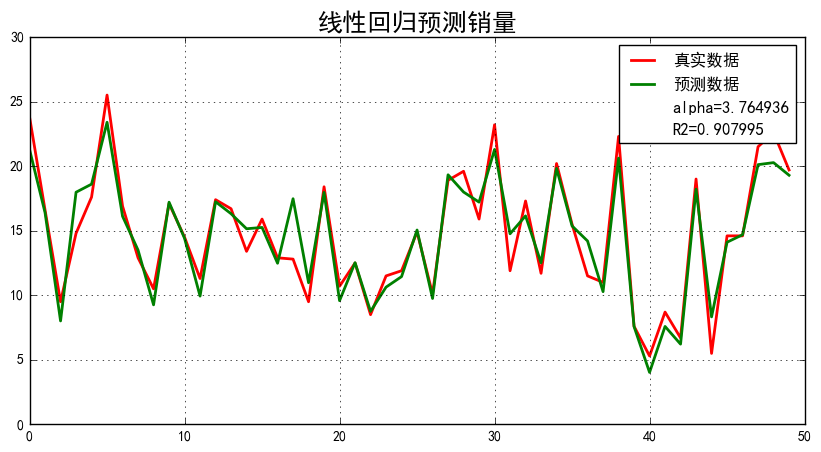

In [47]:
t = np.arange(len(x_test))#获取测试数据个数
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w',figsize=(10,5))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.plot(0, 0, linewidth=0, label=u'alpha=%f' % regression_model.best_params_['alpha'])
plt.plot(0, 0, linewidth=0, label=u'R2=%f' % r)
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

## 梯度下降 
### 梯度是什么：梯度是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-623d0173edf4d640.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 求代价函数的最小值的一种方法叫梯度下降法，也称为最速下降法，是一种迭代的搜索方法。朝着“最快下降”的方向进行搜索。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-7891312fc61c0897.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-362c4db233285560.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 用大白话说就是：当我们随机找到一个起始点，在这个点处找到负梯度下降最快的方向，会有一个交点，再从这个交点出发，继续寻找下降最快的方向，一直做循环，直到某个时候，上一次的梯度和这次的梯度相差在一个很小的范围内，我们就认为找到了局部最优的点，至于是不是全局的最优点，还需要再探索。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-85bcbe5ce18ed299.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 如图，可能会因为步长或者函数的形状等原因，我们有可能只能找到一个局部的最优点，如何跳出这个局部小坑呢，后面我们会继续说。
## 梯度下降法一般步骤
![image.png](http://upload-images.jianshu.io/upload_images/1656466-f736b12577466e0d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 其中α是我们手动设置，θ也是我们随机找的一个点。
### 梯度如何求解呢
![image.png](http://upload-images.jianshu.io/upload_images/1656466-ab51bcc2be5999b5.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
![image.png](http://upload-images.jianshu.io/upload_images/1656466-6dc1f519c8872862.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 代码实现梯度下降
![image.png](http://upload-images.jianshu.io/upload_images/1656466-9cb84d7a53db0b45.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [58]:
from numpy import*

def f(x): #f(x)=x^4-3x^3+2
    return x**4-3*x**3+2
def f1(x): #f(x)的导函数
    return 4*x**3-9*x**2
for j in range(-5,0):
    print('xold=',j)
    for i in range(1,8):
        xold=j
        xnew=i
        alpha=0.01
        count = 0
        while(abs(f(xnew)-f(xold))>0.000001):
            count += 1
            xold=xnew
            xnew=xold-alpha*f1(xold)
        print ('i=',i,'f(new)=',f(xnew),'xnew=',xnew,'count=',count)

xold= -5
i= 1 f(new)= -6.542967391199316 xnew= 2.249633623584228 count= 47
i= 2 f(new)= -6.542967279588257 xnew= 2.2496188718640284 count= 30
i= 3 f(new)= -6.542967589166455 xnew= 2.2503385664302678 count= 31
i= 4 f(new)= -6.542967193124312 xnew= 2.250392083893472 count= 31
i= 5 f(new)= -6.54296875 xnew= 2.25 count= 2
i= 6 f(new)= -6.542967579899859 xnew= 2.249660016570137 count= 60
i= 7 f(new)= 2.0001082958291776 xnew= -0.03292934905691732 count= 311
xold= -4
i= 1 f(new)= -6.542967391199316 xnew= 2.249633623584228 count= 47
i= 2 f(new)= -6.542967279588257 xnew= 2.2496188718640284 count= 30
i= 3 f(new)= -6.542967589166455 xnew= 2.2503385664302678 count= 31
i= 4 f(new)= -6.542967193124312 xnew= 2.250392083893472 count= 31
i= 5 f(new)= -6.54296875 xnew= 2.25 count= 2
i= 6 f(new)= -6.542967579899859 xnew= 2.249660016570137 count= 60
i= 7 f(new)= 2.0001082958291776 xnew= -0.03292934905691732 count= 311
xold= -3
i= 1 f(new)= -6.542967391199316 xnew= 2.249633623584228 count= 47
i= 2 f(new)= 

### 批量梯度下降（BGD）
![image.png](http://upload-images.jianshu.io/upload_images/1656466-43bc2040884a55c6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 代码实现

w_gradDescent=
[[ 3.00758726]
 [ 1.69562035]]


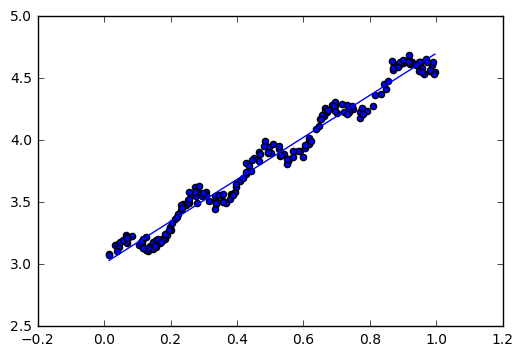

In [64]:
from numpy import *

#获取训练数据
#dataList：训练数据的特征
#targetList：训练数据的目标值
def loadDataSet(filename):
    #获取特征维数
    numFeat=len(open(filename).readline().split('\t'))-1
    dataList=[]#存样本的特征
    targetList=[]#存样本对应的类别标签
    fr=open(filename)
    #按行获取样本数据:特征+目标值
    for line in fr.readlines():
        lineList=[]
        curLine=line.strip().split('\t')#去空格，回车等
        #每个样本的特征（按行存）
        for i in range(numFeat):
            lineList.append(float(curLine[i]))#获取当前行
        dataList.append(lineList)#按行累加存储样本特征
        targetList.append(float(curLine[-1]))#样本的类别标签
    return dataList,targetList
def gradDescent(dataMatIn, classLabels):
    #转为NumPy可识别的矩阵
    dataMatrix = mat(dataMatIn)             
    #为了便于计算，classLabels为行向量转为列向量
    labelMat = mat(classLabels).transpose() 
    #获取输入数据的条数m，特征数n
    m,n = shape(dataMatrix)    
    #设定迭代的步长alpha
    alpha = 0.001
    #设置循环次数500次，即训练次数，人为给定
    maxCycles = 500
    #权值初始化为1（就是让θ矩阵是全为1），后面根据样本数据调整
    #训练结束得到最优权值
    #weights为n行，1维。为列向量。
    weights = ones((n,1))#array类型
    #循环maxCycles次，
    #每次根据模型输出结果与真实值的误差，调整权值。
    for k in range(maxCycles):    
        #dataMatrix*weights矩阵的乘法。
        #事实上包含600次的乘积
        #h为模型给出的一个预测值
        h = dataMatrix*weights  #dataMatrix是全量数据
        #计算误差，每条记录真实值与预测值之差
        error = h-labelMat
        #权值调整(未知参数调整)，强制转换为matrix类型
        weights = weights - alpha * dataMatrix.transpose()* error
    #循环次数结束，返回回归系数
    return weights
#图形化显示标准线性回归结果，包括数据集及它的最佳拟合直线    
def standplot(xarr,yarr,w):
    import matplotlib.pyplot as plt
    xmat=mat(xarr)
    ymat=mat(yarr)
    #画点
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xmat[:,1].flatten().A[0],ymat.T[:,0].flatten().A[0])
    #画线，为了保证直线上的点是按顺序排列，需按升序排列
    xCopy = xmat.copy()
    #排序
    xCopy.sort(0)  #排序
    yHat = xCopy*w #预测值
    ax.plot(xCopy[:,1],yHat)
    plt.show()

dataMatIn, classLabels = loadDataSet('ex0.txt')
#批处理梯度下降法
w_gradDescent=gradDescent(dataMatIn, classLabels)
print('w_gradDescent=')
print(w_gradDescent)
standplot(dataMatIn,classLabels,w_gradDescent)

### 随机梯度下降（SGD）
![image.png](http://upload-images.jianshu.io/upload_images/1656466-4ce341a4cd0d4349.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
### 代码实现

w_stocGradDescent0=
[[ 3.00919632]
 [ 1.69575696]]


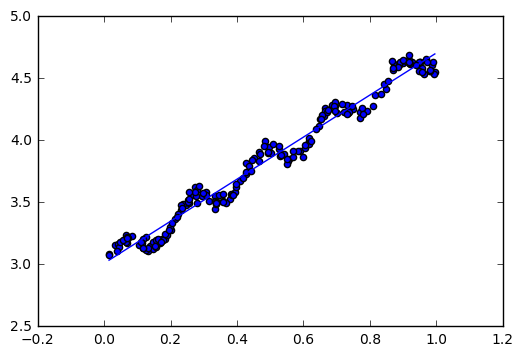

In [65]:
def stocGradDescent0(dataMatrix, classLabels, numIter=100):
    #list类型转换array类型
    dataMatrix=array(dataMatrix)
    #获取训练数据条数m，维度n
    m,n = shape(dataMatrix)
    #步长
    alpha = 0.01
    #权值初始化为1，后面根据样本数据调整
    weights = ones(n)   #array类型
    #循环numIter次
    for j in range(numIter):
        #遍历每一条数据
        for i in range(m):

        #h为当前样本的预测值，批处理梯度上升算法的h为所有样本的模型输出
        #此处h为一个值，即一次只有一个样本更新
        #dataMatrix[i]*weights也为当前样本行乘以权值weights
            h = sum(dataMatrix[i]*weights) #array类型元素级运算
    #误差，此处error为一个值
            error = h-classLabels[i]
    #只选择当前样本进行权值更新
            #array类型，元素级别运算
            weights = weights - alpha * error*dataMatrix[i]
    #返回权值
    return mat(weights).transpose()
#随机梯度下降法
w_stocGradDescent0=stocGradDescent0(dataMatIn, classLabels)
print('w_stocGradDescent0=')
print(w_stocGradDescent0)
standplot(dataMatIn,classLabels,w_stocGradDescent0)

## 梯度下降法考虑因素
### 梯度下降法主要考虑两个方面问题：一是方向，二是步长。
### 方向决定是否走在最优化的道路上，而步长决定了要多久才能到达最优的地方。
### 对于第一方面，就是求梯度，多元函数求相应变量的偏导数；对于第二方面，如果步子太少，则需要很长的时间才能达到目的地，如果步子过大，可能导致在目的地周围来回震荡，所以步长选择比较关键。
![image.png](http://upload-images.jianshu.io/upload_images/1656466-70e87b43c2761bb2.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
## 求最优解方法：
### 1、如果优化函数存在解析解。例如我们求最值一般是对优化函数求导，找到导数为0的点。如果代价函数能简单求导，并且求导后为0的式子存在解析解，那么我们就可以直接得到最优的参数。
### 2、如果式子很难求导，例如函数里面存在隐含的变量或者变量相互间存在耦合，互相依赖的情况。或者求导后式子得不到解释解，或者未知参数的个数大于方程组的个数等。这时候使用迭代算法来一步一步找到最优解。

# 进阶知识点

### ridge回归代码实现

设计矩阵为：
[[ 1.          0.5         0.33333333  0.25        0.2       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714]
 [ 0.25        0.2         0.16666667  0.14285714  0.125     ]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1       ]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333]
 [ 0.11111111  0.1         0.09090909  0.08333333  0.07692308]
 [ 0.1         0.09090909  0.08333333  0.07692308  0.07142857]]

 alpha的值为：
[  1.00000000e-10   1.09698580e-10   1.20337784e-10   1.32008840e-10
   1.44811823e-10   1.58856513e-10   1.74263339e-10   1.91164408e-10
   2.09704640e-10   2.30043012e-10   2.52353917e-10   2.76828663e-10
   3.03677112e-10   3.33129479e-10   3.65438307e-10   4.00880633e-10
   4.39760361e-10   4.82410870e-10   5.29197874e-10   5.80522552e-10
   6.

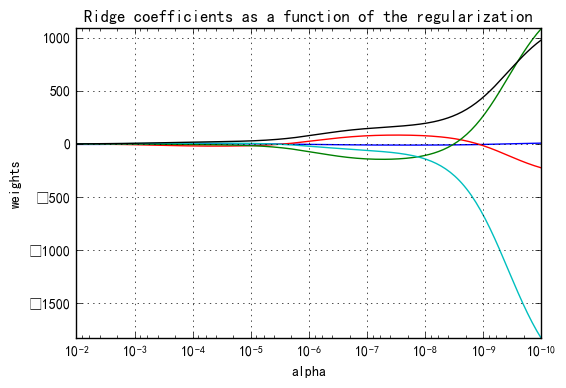

In [18]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# 这里设计矩阵X是一个希尔伯特矩阵（Hilbert matrix）
# 其元素A（i,j）=1/(i + j -1),i和j分别为其行标和列标
# 希尔伯特矩阵是一种数学变换矩阵，正定，且高度病态即，任何一个元素发生一点变动，整个矩阵的行列式的值和逆矩阵都会发生巨大变化
# 这里设计矩阵是一个10x5的矩阵，即有10个样本，5个变量

#np.newaxis的功能是插入新维度
X = 1. / (np.arange(1, 6) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
print('设计矩阵为：')
print(X)
# alpha 取值为10^（-10）到10^（-2）之间的连续的200个值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print('\n alpha的值为：')
print(alphas)

# 初始化一个Ridge Regression
clf = linear_model.Ridge(fit_intercept=False)
# 参数矩阵，即每一个alpha对于的参数所组成的矩阵
coefs = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])
ax.set_prop_cycle(cycler('color', ['b', 'r', 'g', 'c', 'k']))  #报错请使用上面的语句

# 绘制alpha和对应的参数之间的关系图
ax.plot(alphas, coefs)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 坐标轴下降算法（coordinate descent）

测试集上的R2可决系数 : 0.960118


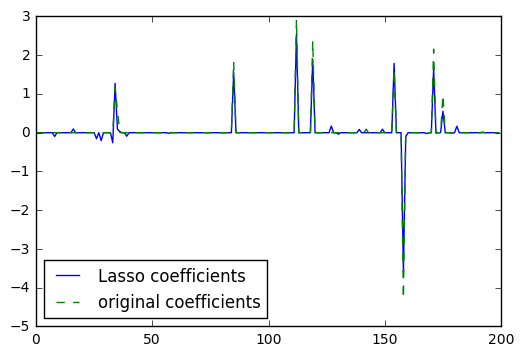

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 用于产生稀疏数据
np.random.seed(1)
# 生成系数数据，样本为50个，参数为200维
n_samples, n_features = 50, 200
# 基于高斯函数生成数据
x = np.random.randn(n_samples, n_features)
# 每个变量对应的系数
coef = 3 * np.random.randn(n_features)
# 变量的下标
inds = np.arange(n_features)
# 变量下标随机排列
np.random.shuffle(inds)
# 仅仅保留10个变量的系数，其他系数全部设置为0
# 生成稀疏参数
coef[inds[10:]] = 0
# 得到目标值，y
y = np.dot(x, coef)
# 为y添加噪声
y += 0.01 * np.random.normal((n_samples,))

# 将数据分为训练集和测试集

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=1)
    #默认test_size=0.25
    #train_test_split将数组或矩阵分割成随机的训练子集和测试子集
    #random_state属性值为空(默认为空)则随机分配测试集和训练集x_test, y_test = x[n_samples / 2:], y[n_samples / 2:]

# Lasso 回归的参数
alpha = 0.1
lasso = Lasso(max_iter=10000, alpha=alpha)

# 基于训练数据，得到的模型的测试结果
# 这里使用的是坐标轴下降算法（coordinate descent）
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
# 这里是R2可决系数（coefficient of determination）
# 回归平方和（RSS）在总变差（TSS）中所占的比重称为可决系数
# 可决系数可以作为综合度量回归模型对样本观测值拟合优度的度量指标。
# 可决系数越大，说明在总变差中由模型作出了解释的部分占的比重越大，模型拟合优度越好。
# 反之可决系数小，说明模型对样本观测值的拟合程度越差。
# R2可决系数最好的效果是1。
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("测试集上的R2可决系数 : %f" % r2_score_lasso)

plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')

plt.show()

## 最小角回归(LARS)算法

(442, 10)
基于LARS算法计算正则化路径：
.

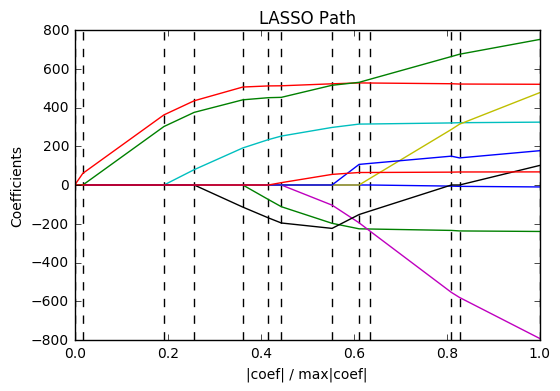

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

# 导入数据集
# 这个数据集，总的样本个数为442个，特征维度为10
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print(X.shape)

# 参数正则化路径
# 其实就是最小角回归(LARS)算法每次迭代的时候，每个参数的数值所组成的曲线
# 其横轴对应着迭代的程度，纵轴是每个特征参数对应的数值
# 这里一共有10个特征，所以有10条特征正则化曲线

print("基于LARS算法计算正则化路径：")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

# 这里将迭代程度归一化到[0,1]直间
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()